Clusters: 2, DB Index: 1.421156804537162
Clusters: 3, DB Index: 1.5990483232741395
Clusters: 4, DB Index: 1.4889731441124265
Clusters: 5, DB Index: 1.385221093344789
Clusters: 6, DB Index: 1.334465766698344
Clusters: 7, DB Index: 1.3648954479020425
Clusters: 8, DB Index: 1.3625154847461094
Clusters: 9, DB Index: 1.3081903071852734
Clusters: 10, DB Index: 1.286837469726414
Optimal number of clusters: 10


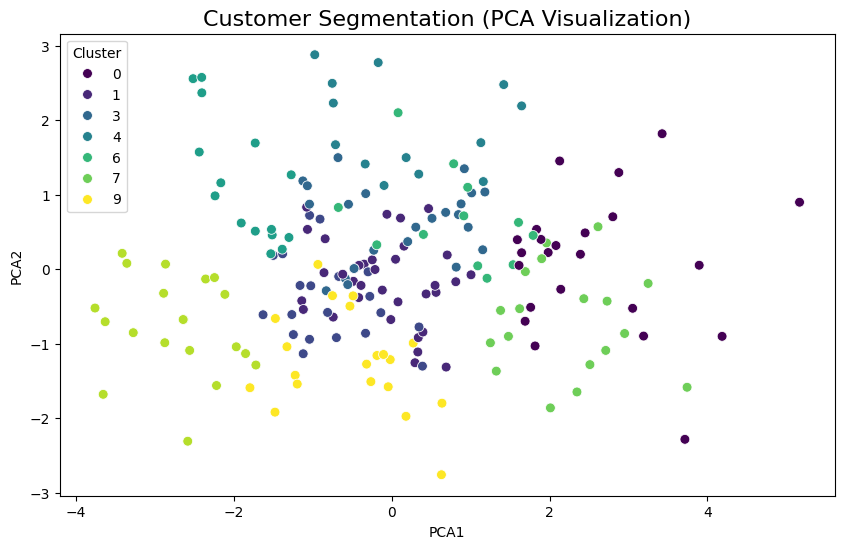

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets based on CustomerID
data = pd.merge(transactions, customers, on='CustomerID')

# Aggregate transaction data for each customer
customer_agg = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).reset_index()

# Flatten multi-level column names
customer_agg.columns = ['CustomerID', 'TotalPurchase', 'AvgPurchase', 'NumTransactions', 'TotalQuantity']

# Add customer profile information (Region, SignupDate)
customer_agg = pd.merge(customer_agg, customers[['CustomerID', 'Region', 'SignupDate']], on='CustomerID')

# Encode categorical features
le = LabelEncoder()
customer_agg['Region'] = le.fit_transform(customer_agg['Region'])

# Drop non-numeric or irrelevant columns
customer_agg['SignupDate'] = pd.to_datetime(customer_agg['SignupDate'])  # Convert to datetime if needed
customer_agg['SignupYear'] = customer_agg['SignupDate'].dt.year  # Extract year
customer_agg.drop(columns=['SignupDate'], inplace=True)

# Feature Scaling
scaler = StandardScaler()
features = customer_agg.drop(columns=['CustomerID'])  # Exclude CustomerID
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
db_scores = []
for n_clusters in range(2, 11):  # Experiment with 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_score = davies_bouldin_score(scaled_features, labels)
    db_scores.append((n_clusters, db_score))
    print(f"Clusters: {n_clusters}, DB Index: {db_score}")

# Find optimal clusters (lowest DB Index)
optimal_clusters = min(db_scores, key=lambda x: x[1])[0]
print(f"Optimal number of clusters: {optimal_clusters}")

# Final KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_agg['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_agg['PCA1'] = reduced_features[:, 0]
customer_agg['PCA2'] = reduced_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_agg, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title('Customer Segmentation (PCA Visualization)', fontsize=16)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Save clustering results
customer_agg.to_csv('Customer_Segmentation.csv', index=False)


In [12]:
from google.colab import files
uploaded = files.upload()


Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


['.config', 'Transactions.csv', 'Business_Insights.pdf', 'Customers.csv', 'drive', 'Products.csv', 'Lookalike.csv', 'Customer_Segmentation.csv', 'sample_data']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>